In [1]:
!pip install category_encoders



     |████████████████████████████████| 82 kB 213 kB/s 


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jacksdata/Bank-Data-EDA-Dashboard/main/bank-direct-marketing-campaigns.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'], dtype=object)

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data(df)

,Total,Percent
y,0,0.0
nr.employed,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


In [10]:
df.groupby('y').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,
no,39.911185,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [11]:
df.groupby('education').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,
basic.4y,47.596504,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [12]:
df.groupby('marital').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,
divorced,44.899393,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [13]:
df.groupby('job').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,
admin.,38.187296,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [14]:
def column_count_plot(input_arr):
  column, title, color, xrotation , x_label = [e for e in input_arr]
  temp = df[column].value_counts()
  plot_df = pd.DataFrame({x_label: temp.index,
                   'Count': temp.values
                  })
  plt.figure(figsize = (6,6))
  plt.title(title)
  sns.set_color_codes(color)
  sns.barplot(x = x_label, y='Count', data=plot_df)
  locs, labels = plt.xticks()
  plt.xticks(rotation=xrotation)
  plt.show()
  print()

In [ ]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# fig.suptitle('Pokemon Stats by Generation')

# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
# sns.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
# sns.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
# sns.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
# sns.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
# sns.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=day_sum.index,y=day_sum.values,ax=ax)
plt.show()

In [55]:
def sns_bar(a_df_list):
  
  fig, ax = plt.subplots()
  fig.set_size_inches((12,4))
  sns.barplot(x=day_sum.index,y=day_sum.values,ax=ax)
  plt.show()

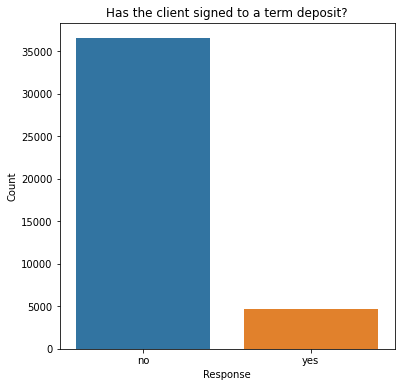

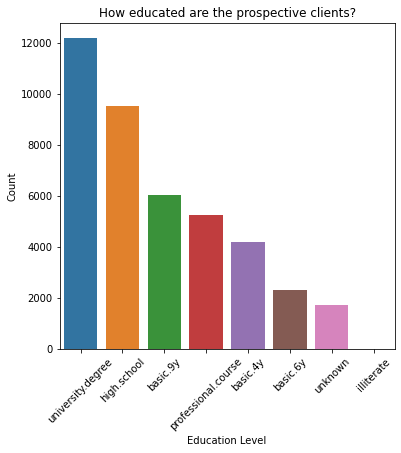

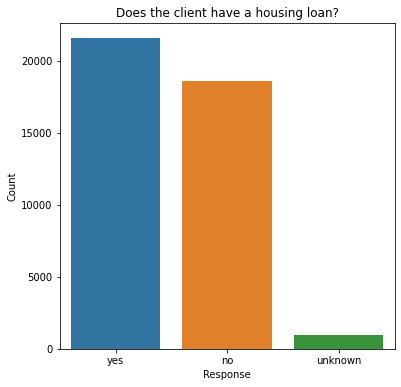

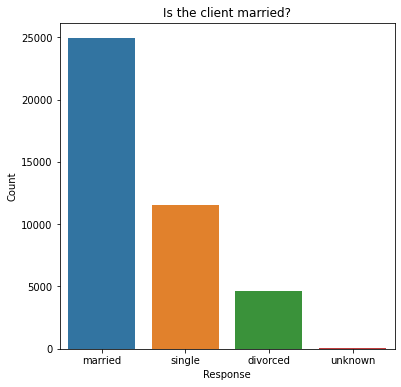

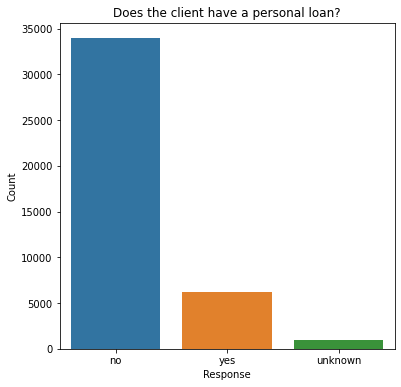

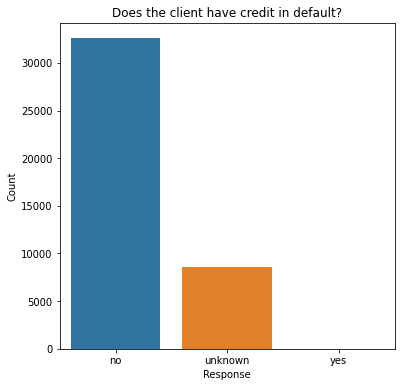

In [15]:
success_plot = ['y', 'Has the client signed to a term deposit?', 'pastel', 0, 'Response']
education_plot = ['education', 'How educated are the prospective clients?', 'pastel', 45, 'Education Level']
housing_plot = ['housing', 'Does the client have a housing loan?', 'pastel', 0, 'Response']
marital_plot = ['marital', 'Is the client married?', 'pastel', 0, 'Response']
loan_plot = ['loan', 'Does the client have a personal loan?', 'pastel', 0, 'Response']
default_plot = ['default', 'Does the client have credit in default?', 'pastel', 0, 'Response']
month
campaign 
days 
poutcome
pdays

column_count_plot(success_plot)
column_count_plot(education_plot)
column_count_plot(housing_plot)
column_count_plot(marital_plot)
column_count_plot(loan_plot)
column_count_plot(default_plot)


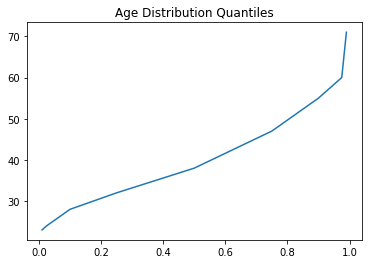

In [16]:
df['age'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]).plot(kind='line',title='Age Distribution Quantiles')


Text(0, 0.5, 'Success Ratio')

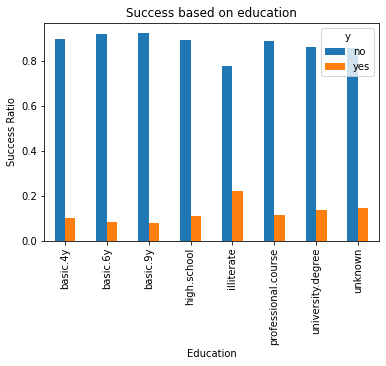

In [17]:
pd.crosstab(df.education,df.y, normalize='index').plot(kind='bar', )
plt.title('Success based on education')
plt.xlabel('Education')
plt.ylabel('Success Ratio')
#illiterate leads with a small sample size tho

In [19]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [20]:
no_default = df.drop(columns=['default'])

In [21]:
month_sum = df['month'].value_counts()
month_sum

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

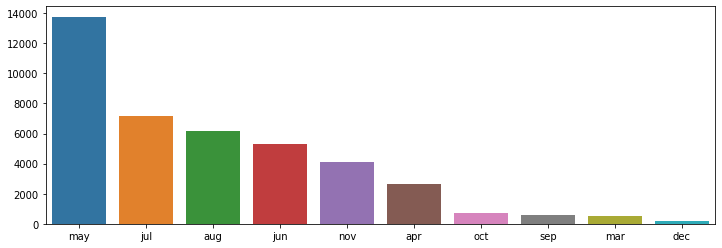

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=month_sum.index,y=month_sum.values,ax=ax)
plt.show()

Text(0, 0.5, 'Success Ratio')

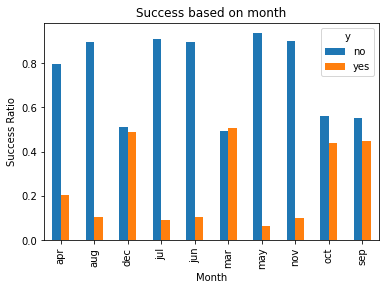

In [23]:
pd.crosstab(df.month,df.y, normalize='index').plot(kind='bar', )
plt.title('Success based on month')
plt.xlabel('Month')
plt.ylabel('Success Ratio')

Text(0, 0.5, 'Count')

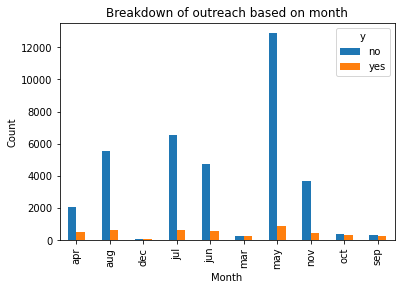

In [24]:
pd.crosstab(df.month,df.y).plot(kind='bar', )
plt.title('Breakdown of outreach based on month')
plt.xlabel('Month')
plt.ylabel('Count')

In [25]:
day_sum = df['day_of_week'].value_counts()
day_sum

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

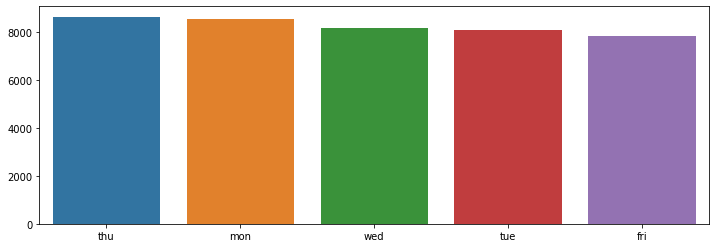

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=day_sum.index,y=day_sum.values,ax=ax)
plt.show()

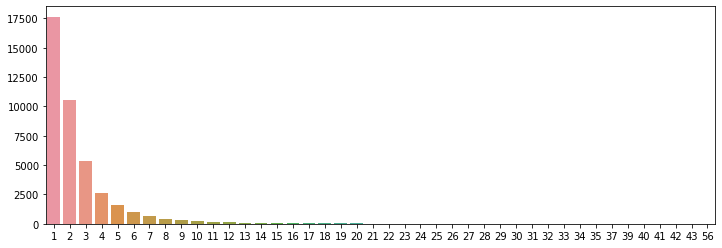

In [27]:
campaign_sum = df['campaign'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=campaign_sum.index,y=campaign_sum.values,ax=ax)
plt.show()

Text(0, 0.5, 'Contacts')

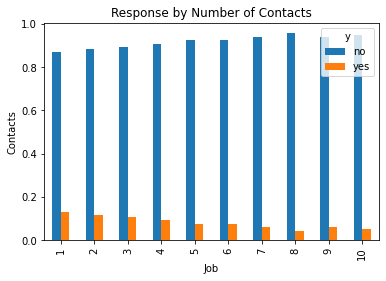

In [28]:
campaign_10 = df[df['campaign'] < 11]

pd.crosstab(campaign_10.campaign,campaign_10.y, normalize='index').plot(kind='bar')
plt.title('Response by Number of Contacts')
plt.xlabel('Job')
plt.ylabel('Contacts')
#shows deminishing returns or weaker follow up contacts, but the number of campaigns with 4+ contacts drops off quickly so id say its inconclusive from this angle

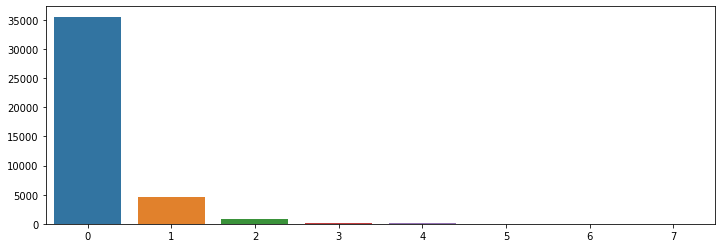

In [29]:
previous = df['previous'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=previous.index,y=previous.values,ax=ax)
plt.show()

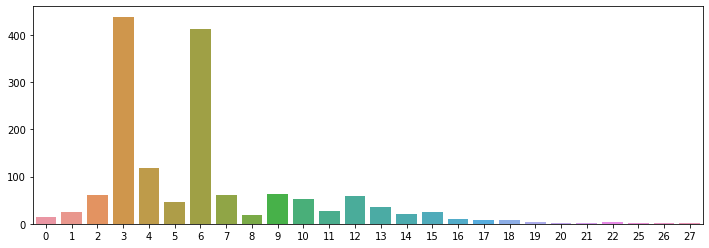

In [30]:
previous_days = df[df['pdays'] != 999]
pdays_sum = previous_days['pdays'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=pdays_sum.index,y=pdays_sum.values,ax=ax)
plt.show()

Text(0, 0.5, 'Contacts')

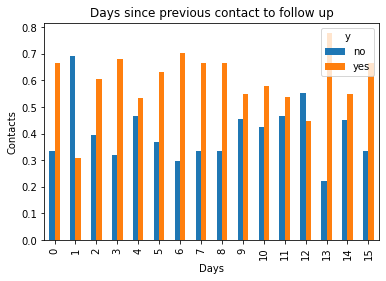

In [31]:
pdays_15 = previous_days[previous_days['pdays'] < 16]

pd.crosstab(pdays_15.pdays,pdays_15.y, normalize='index').plot(kind='bar')
plt.title('Days since previous contact to follow up')
plt.xlabel('Days')
plt.ylabel('Contacts')
#ideal follow up time is same day (situational), past that it seems 2 - 15 is solid 

In [32]:
campaign_sum

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

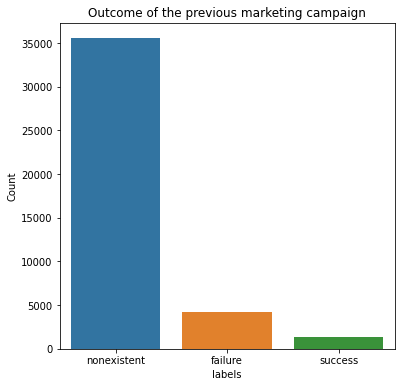

In [33]:
temp = df["poutcome"].value_counts()
plot_df = pd.DataFrame({'labels': temp.index,
                   'Count': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Outcome of the previous marketing campaign')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="Count", data=plot_df)
locs, labels = plt.xticks()
plt.show()

In [34]:
emp_var_plot = df['emp.var.rate'].value_counts().sort_index()
emp_var_plot 

-3.4     1071
-3.0      172
-2.9     1663
-1.8     9184
-1.7      773
-1.1      635
-0.2       10
-0.1     3683
 1.1     7763
 1.4    16234
Name: emp.var.rate, dtype: int64

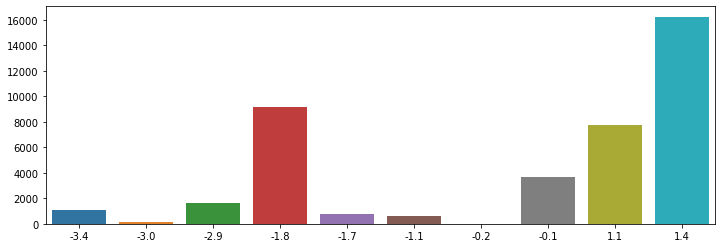

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=emp_var_plot.index,y=emp_var_plot.values,ax=ax)
plt.show()

In [36]:
cons_price_plot = df['cons.price.idx'].value_counts().sort_index()
cons_price_plot 

92.201     770
92.379     267
92.431     447
92.469     178
92.649     357
92.713     172
92.756      10
92.843     282
92.893    5794
92.963     715
93.075    2458
93.200    3616
93.369     264
93.444    5175
93.749     174
93.798      67
93.876     212
93.918    6685
93.994    7763
94.027     233
94.055     229
94.199     303
94.215     311
94.465    4374
94.601     204
94.767     128
Name: cons.price.idx, dtype: int64

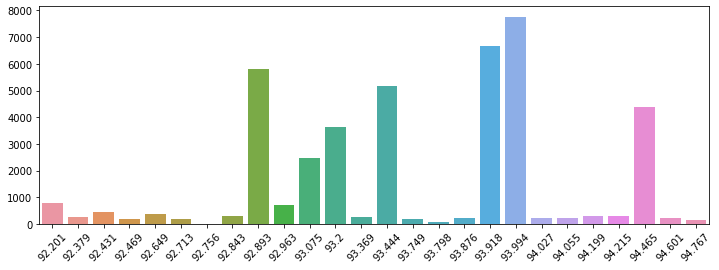

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=cons_price_plot.index,y=cons_price_plot.values,ax=ax)
plt.xticks(rotation=45)
plt.show()

In [38]:
cons_conf_plot = df['cons.conf.idx'].value_counts().sort_index()
cons_conf_plot

-50.8     128
-50.0     282
-49.5     204
-47.1    2458
-46.2    5794
-45.9      10
-42.7    6685
-42.0    3616
-41.8    4374
-40.8     715
-40.4      67
-40.3     311
-40.0     212
-39.8     229
-38.3     233
-37.5     303
-36.4    7763
-36.1    5175
-34.8     264
-34.6     174
-33.6     178
-33.0     172
-31.4     770
-30.1     357
-29.8     267
-26.9     447
Name: cons.conf.idx, dtype: int64

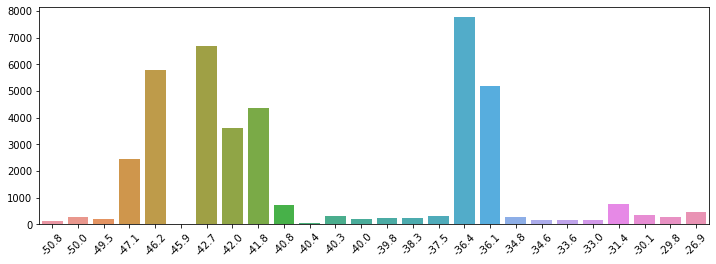

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=cons_conf_plot.index,y=cons_conf_plot.values,ax=ax)
plt.xticks(rotation=45)
plt.show()

In [40]:
euribor3m = df['euribor3m'].value_counts().sort_index()
euribor3m

0.634      8
0.635     43
0.636     14
0.637      6
0.638      7
        ... 
4.967    643
4.968    992
4.970    172
5.000      7
5.045      9
Name: euribor3m, Length: 316, dtype: int64

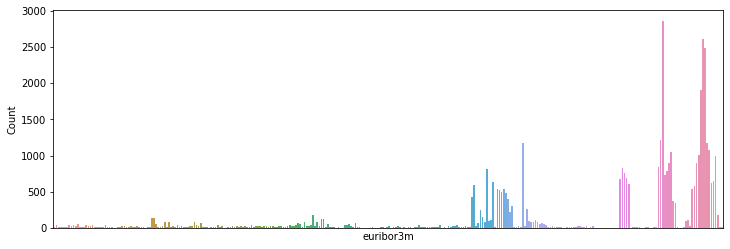

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=euribor3m.index,y=euribor3m.values,ax=ax)
ax.set(xlabel="euribor3m", ylabel = "Count")
ax.set(xticks=[])
plt.show()

In [42]:
nr_employed = df['nr.employed'].value_counts().sort_index()
nr_employed

4963.6      635
4991.6      773
5008.7      650
5017.5     1071
5023.5      172
5076.2     1663
5099.1     8534
5176.3       10
5191.0     7763
5195.8     3683
5228.1    16234
Name: nr.employed, dtype: int64

[[]]

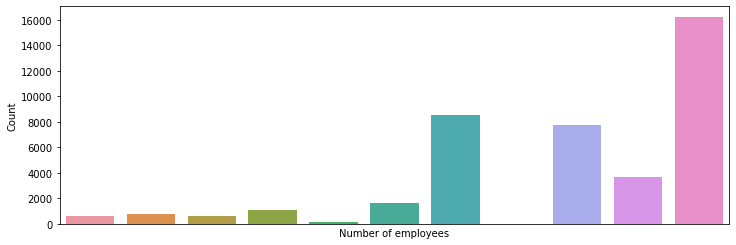

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.barplot(x=nr_employed.index,y=nr_employed.values,ax=ax)
ax.set(xlabel="Number of employees", ylabel = "Count")
ax.set(xticks=[])

Text(0, 0.5, 'Counts')

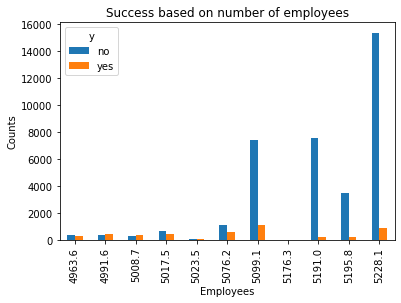

In [44]:
pd.crosstab(df['nr.employed'],df.y).plot(kind='bar')
plt.title('Success based on number of employees')
plt.xlabel('Employees')
plt.ylabel('Counts')

In [45]:
nr_employed

4963.6      635
4991.6      773
5008.7      650
5017.5     1071
5023.5      172
5076.2     1663
5099.1     8534
5176.3       10
5191.0     7763
5195.8     3683
5228.1    16234
Name: nr.employed, dtype: int64

In [46]:
illiterate_df = df[df['education'] == 'illiterate']

In [47]:
len(illiterate_df)

18

In [48]:
unknown_df = df[df['education'] == 'unknown']

In [49]:
unknown_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [50]:
unknown_df['job'].value_counts()

blue-collar      454
admin.           249
technician       212
student          167
services         150
unknown          131
management       123
retired           98
entrepreneur      57
housemaid         42
self-employed     29
unemployed        19
Name: job, dtype: int64

Text(0, 0.5, 'Frequency of Purchase')

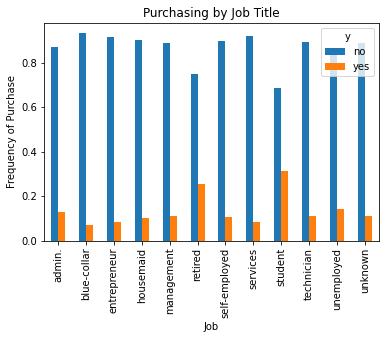

In [51]:
pd.crosstab(df.job,df.y, normalize='index').plot(kind='bar')
plt.title('Purchasing by Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [52]:
df['education'].value_counts().keys()

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object')

In [53]:
basic9y = df[df['education'] == 'basic.9y']

In [54]:
basic9y['job'].value_counts()

blue-collar      3623
admin.            499
services          388
technician        384
self-employed     220
entrepreneur      210
unemployed        186
management        166
retired           145
student            99
housemaid          94
unknown            31
Name: job, dtype: int64

In [20]:
encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'unknown':4,'high.school':5, 'professional.course': 6, 'university.degree':7}}])

In [21]:
df = encoder.fit_transform(df)

In [60]:
categorical_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

df = pd.get_dummies(df, prefix=categorical_vars)

